In [6]:
import numpy as np
from tqdm import tnrange
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.signal
import torch
import torch.nn.functional as F
import scipy

In [7]:
base_dir = "/media/hdd01/sklee/"
experiment = "rand"
cell_type = "CA1"
E_neural_file = "Espikes_neural.npz"
V_file = "V_diff.npy"
eloc_file = "Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep651_stimseed1.npy"
#eloc_file = "Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"

E_neural = scipy.sparse.load_npz(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)
eloc = np.load(base_dir+cell_type+"_"+experiment+"/data/"+eloc_file)

In [5]:
heat_map = np.empty((2000,2000))

S_wind = 30
S_t = np.arange(-S_wind, S_wind)
S_kern = np.exp(-S_t**2/500)
V_wind = 75

for syn in tnrange(2000):
    syn_except = np.arange(2000)
    syn_except = np.delete(syn_except, syn)
    syn_idx = scipy.sparse.find(E_neural[:,syn])[0]
    syn_neural = E_neural[:,syn].toarray().flatten()
    
    syn_conv = scipy.signal.convolve(syn_neural, S_kern, mode="same")
    neural_conv = E_neural[:,syn_except].multiply(syn_conv.reshape(-1,1))
    neural_conv = scipy.sparse.csr_matrix(neural_conv)
    
    for s in range(syn_idx.shape[0]):
        t_syn = syn_idx[s]
        V_part = V[t_syn : t_syn + V_wind]
        V_weight = np.sum(np.abs(V_part))
        
        neural_conv_part = neural_conv[t_syn - S_wind: t_syn + S_wind].toarray()
        S_part_contrib = np.sum(neural_conv_part, 0) * V_weight
        heat_map[syn, syn_except] += S_part_contrib

<ipython-input-5-80181dc3f169>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for syn in tnrange(2000):


KeyboardInterrupt: 

In [8]:
syn_no = 400
syn_except = np.arange(2000)
syn_except = np.delete(syn_except, syn_no)
syn_idx = scipy.sparse.find(E_neural[:,syn_no])[0]
syn_neural = E_neural[:,syn_no].toarray().flatten()

S_wind = 30
S_t = np.arange(-S_wind, S_wind)
S_kern = np.exp(-S_t**2/500)
syn_conv = scipy.signal.convolve(syn_neural, S_kern, mode="same")
neural_conv = E_neural[:,syn_except].multiply(syn_conv.reshape(-1,1))
neural_conv = scipy.sparse.csr_matrix(neural_conv)

hist = np.zeros((1999))

V_wind = 75
for s in tnrange(syn_idx.shape[0]):
    t_syn = syn_idx[s]
    V_part = V[t_syn : t_syn + V_wind]
    V_weight = np.sum(np.abs(V_part))
    
    neural_conv_part = neural_conv[t_syn - S_wind: t_syn + S_wind].toarray()
    S_part_contrib = np.sum(neural_conv_part, 0) * V_weight
    hist += S_part_contrib



<ipython-input-8-f0f44580f73c>:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for s in tnrange(syn_idx.shape[0]):


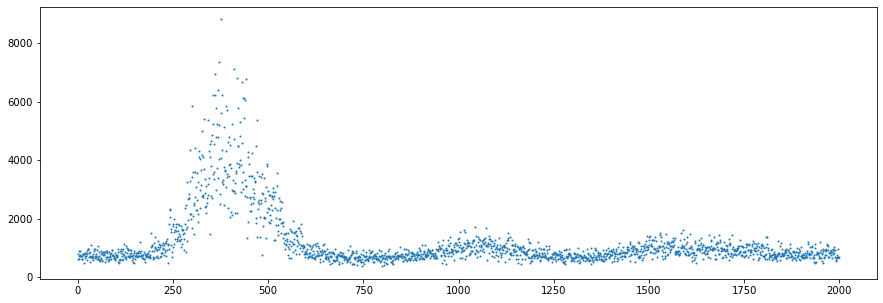

In [9]:
plt.figure(figsize = (15,5))
plt.scatter(np.arange(1999), hist, s=1)